Text(0.5, 1.0, 'Population Distribution')

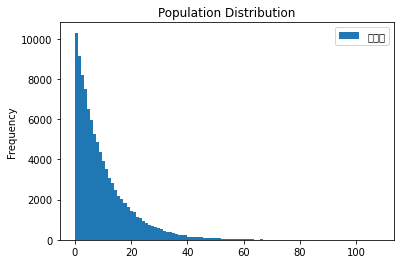

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.precision", 2)


# 각 데이터프레임의 정보를 보여줌(describe)대신 쓰는 거~
def get_info(df, col_list):
    list_std = []
    list_1Q = []
    list_mean = []
    list_median = []
    
    for col in col_list:
        list_1Q.append(round(np.percentile(df[col], 25), 2))
        list_mean.append(round(df[col].mean(), 2))
        list_median.append(round(df[col].median(), 2))        
        list_std.append(round(df[col].std(), 2))        
        
    df_info = pd.DataFrame({'열이름' : col_list,
                           '크기' : len(df), 
                           '표준편차' : list_std,
                           '1Q' : list_1Q,
                           '평균' : list_mean,
                           '중앙값' : list_median}).set_index('열이름').T
    
    return df_info

# 시드 고정
np.random.seed(100)

N = 100000 # 모집단 크기
population_x = np.random.exponential(scale = 10, size = N) # 지수분포 : scale = 1 /lambda
df_population = pd.DataFrame({"모집단" : population_x})

df_population.plot(kind = 'hist', bins = 100)
plt.title("Population Distribution")

In [41]:
# 1. 표본 분포
sample_mean = []

k = 70 # 표본 수집 횟수
n = 40 # 각 표본의 크기

# 각 표본의 평균을 구하는 과정
for i in range(k):
    chosen_idx = np.random.choice(N, replace = False, size = n) # 모집단에서 n개만큼의 표본 무작위로 추출
    x = df_population.iloc[chosen_idx]
    
    avg = x['모집단'].mean()
    
    sample_mean.append(avg)
    
# 70개의 평균으로 이뤄진 표집 분포
df_sample_distri = pd.DataFrame({"표집분포" : sample_mean})


print("공식에 따른 표준 오차 : ", round(df_population['모집단'].std()/np.sqrt(n), 3))


get_info(df_population, ['모집단'])

공식에 따른 표준 오차 :  1.58


열이름,모집단
크기,100000.00
표준편차,9.99
1Q,2.88
평균,10.00
중앙값,6.95


In [42]:
get_info(df_sample_distri, ['표집분포'])


열이름,표집분포
크기,70.00
표준편차,1.64
1Q,8.93
평균,10.13
중앙값,9.96


- 여러번 반복해도 표집 평균은 모평균에 근접하게 나타남을 알 수 있음

In [97]:
# 부트스트랩

# 1. 표본 만들기
n = 50
chosen_idx = np.random.choice(N, replace = False, size = n)
df_sample = df_population.iloc[chosen_idx]
df_sample.rename(columns = {"모집단" : "표본"}, inplace = True)
df_sample.reset_index(drop = True, inplace = True)

# 2. 부트스트랩 표본 만들기
sample_std = []
sample_Q1 = []
sample_mean = []
sample_median = []

k = 70 # 표본에서 부트스트랩 표본을 뽑는 횟수
n_bs = 30 # 부트스트랩 표본 크기

for i in range(k):
    
    chosen_idx = np.random.choice(n, replace = True, size = n_bs)
    x = df_sample.iloc[chosen_idx]
    
    # 통계치 계산
    std = np.std(x)
    Q1 =  np.percentile(x, 25)
    avg = np.mean(x)
    median = np.median(x)
    
    # 리스트에 추가
    sample_std.append(std)
    sample_Q1.append(Q1)
    sample_mean.append(avg)
    sample_median.append(median)
    
columns = ['크기', '표준편차', '1Q', '평균', '중앙값']
sam_dist = np.array([len(sample_mean), 
                     np.mean(sample_std), 
                     np.mean(sample_Q1), 
                     np.mean(sample_mean), 
                     np.mean(sample_median)])


df_sam_dist = pd.DataFrame(sam_dist.reshape(-1, len(sam_dist)), columns = columns).T

df_sam_dist.rename(columns = {0 : '표집분포_BS'}, inplace = True)

# 모집단에서 뽑은 표본 1개 (부트스트랩에 사용됨)
get_info(df_sample, ['표본'])

C:\Users\dowra\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


열이름,표본
크기,50.00
표준편차,7.84
1Q,5.34
평균,10.88
중앙값,9.11


In [98]:
df_sam_dist

,표집분포_BS
크기,70.00
표준편차,7.72
1Q,5.30
평균,10.84
중앙값,8.97


- 모평균인 10 근처에서 부트스트랩 평균 값을 볼 수 있음